In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
train_dataset, test_dataset = get_test_datasets('sensorless', random_seed=200, feature_range=(0,1))
datasets_generator_fun = lambda: get_validation_datasets('sensorless', random_seed=200, feature_range=(0,1))
dataset_shapes = get_dataset_shapes('sensorless')
num_tries = 15

dataset_shapes

([48], [11])

# Scalar network without hidden layers

Average elapsed k-fold validation time: 2477.64452 sec
Last measures: [0.06957658976316453, 0.07214636355638504, 0.0689758911728859, 0.07060032933950425, 0.07502002716064453]


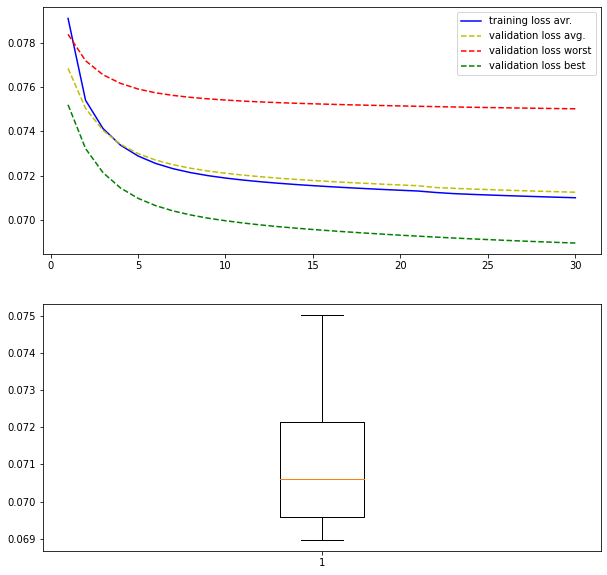

In [3]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=30, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Scalar network with one hidden layer

### S(2)

Average elapsed k-fold validation time: 1753.73983 sec
Last measures: [0.07110066562891007, 0.07317140698432922, 0.07006492763757706, 0.0637884072959423, 0.07560620456933975]


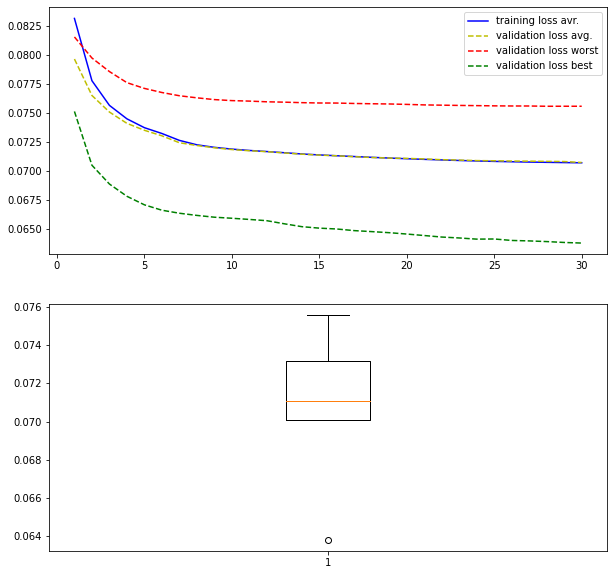

In [4]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[2], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=30, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(5)

Average elapsed k-fold validation time: 1931.98982 sec
Last measures: [0.06342044174671173, 0.061441751569509505, 0.06856059357523918, 0.0640229880809784, 0.06230004951357841]


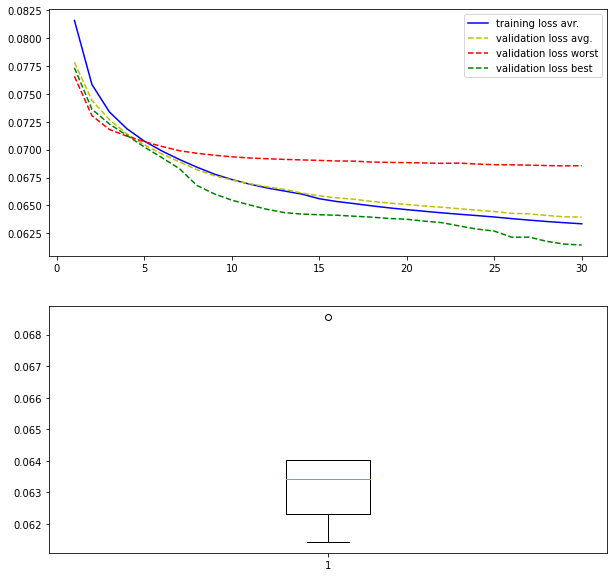

In [5]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[5], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=30, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(15)

Average elapsed k-fold validation time: 1803.39445 sec
Last measures: [0.05724729746580124, 0.05022198632359505, 0.04776203706860542, 0.050221743434667586, 0.05590657033026218]


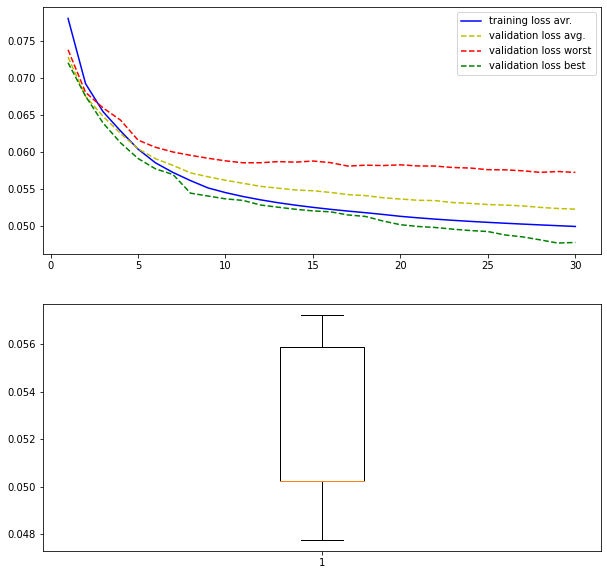

In [6]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[15], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=30, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(30)

Average elapsed k-fold validation time: 886.33008 sec
Last measures: [0.04524487480521202, 0.045437151193618776, 0.04646698907017708, 0.054493369162082674, 0.043010291457176206]


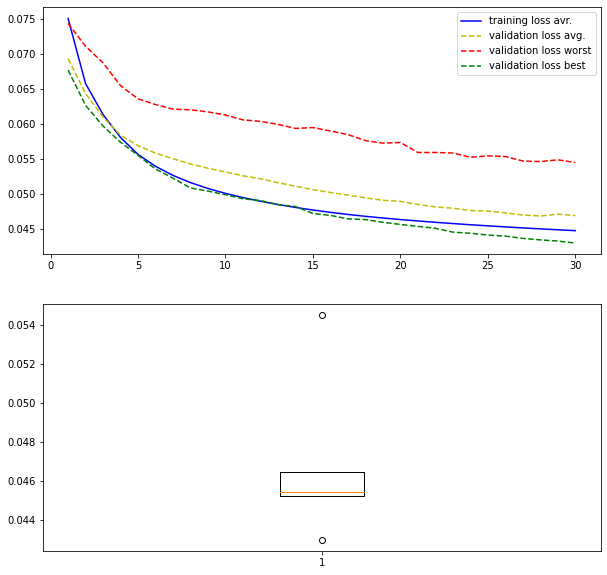

In [7]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[30], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=30, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Scalar network with three hidden layers

### S(2,2,2)

Average elapsed k-fold validation time: 2080.29973 sec
Last measures: [0.07920182198286056, 0.08369200974702835, 0.08559087663888931, 0.08693432062864304, 0.08371939957141876]


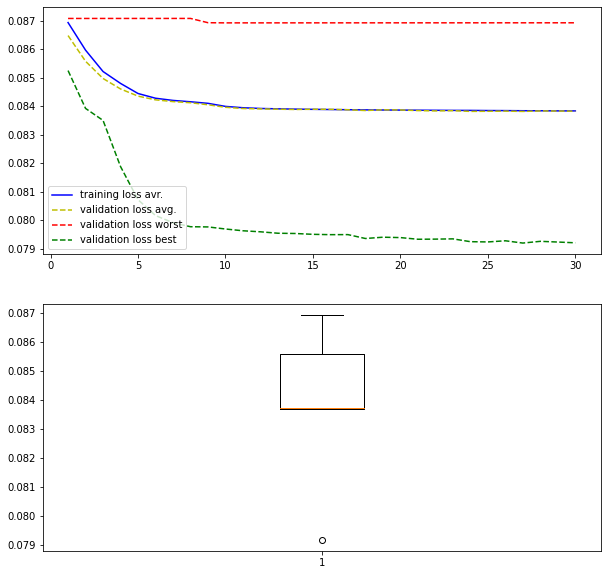

In [8]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[2,2,2], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=30, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(10,7,5)

Average elapsed k-fold validation time: 2095.61277 sec
Last measures: [0.05851419046521187, 0.06045073196291924, 0.06113532781600952, 0.06888535246253014, 0.05888280421495438]


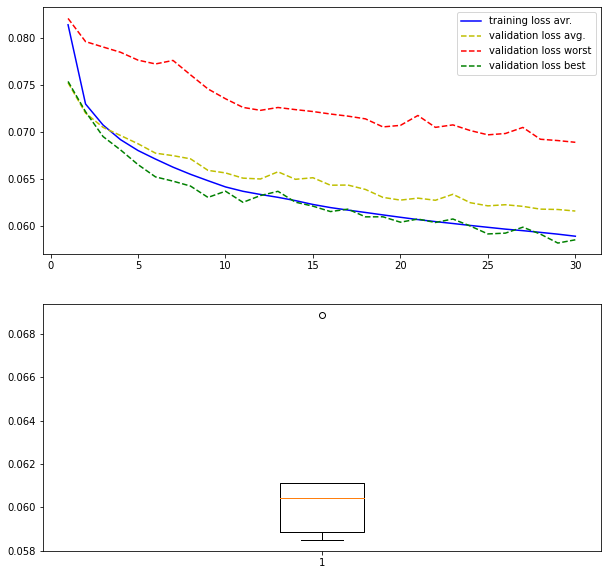

In [9]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[10,7,5], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=30, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Vector network with one hidden layer (c=1), unique weights

### V1(2):U(2)

Average elapsed k-fold validation time: 826.06968 sec
Last measures: [0.0681135468184948, 0.07743563652038574, 0.07888999283313751, 0.0687492847442627, 0.07302893176674843]


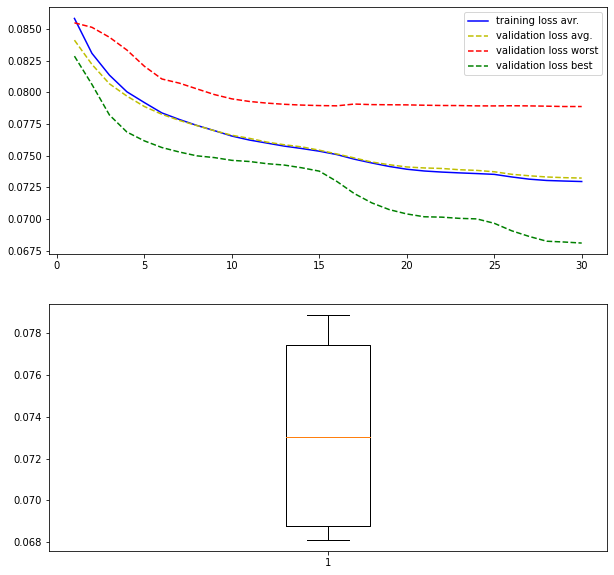

In [10]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(2,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=30, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### V1(5):U(2)

Average elapsed k-fold validation time: 765.31888 sec
Last measures: [0.06161661222577095, 0.05239427089691162, 0.05882597044110298, 0.059602881968021396, 0.06600329950451851]


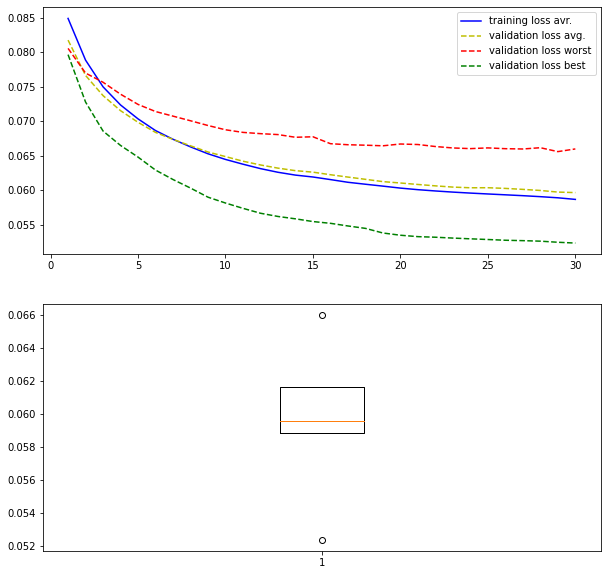

In [11]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(5,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=30, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Vector network with one hidden layer (c=1), shared weights

### V1(2):S(2)

Average elapsed k-fold validation time: 674.96109 sec
Last measures: [0.07312996461987495, 0.07631120979785919, 0.07458396032452583, 0.0764254868030548, 0.07308019548654557]


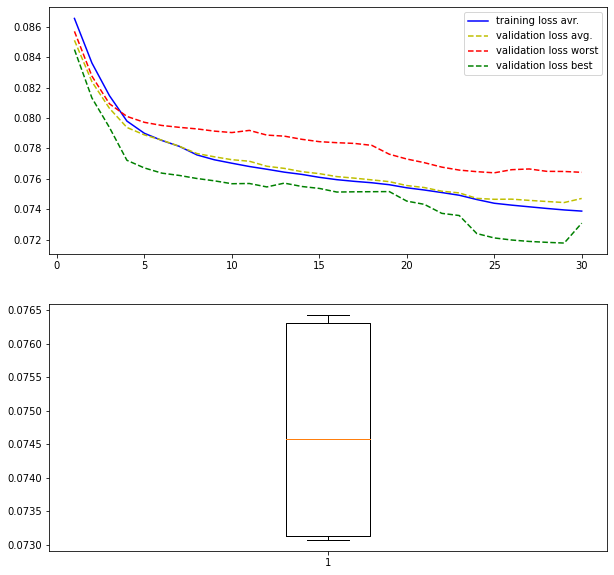

In [13]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(2,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=30, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### V1(5):S(2)

Average elapsed k-fold validation time: 691.16752 sec
Last measures: [0.05901820957660675, 0.065896026045084, 0.05438809096813202, 0.0640400692820549, 0.0544232040643692]


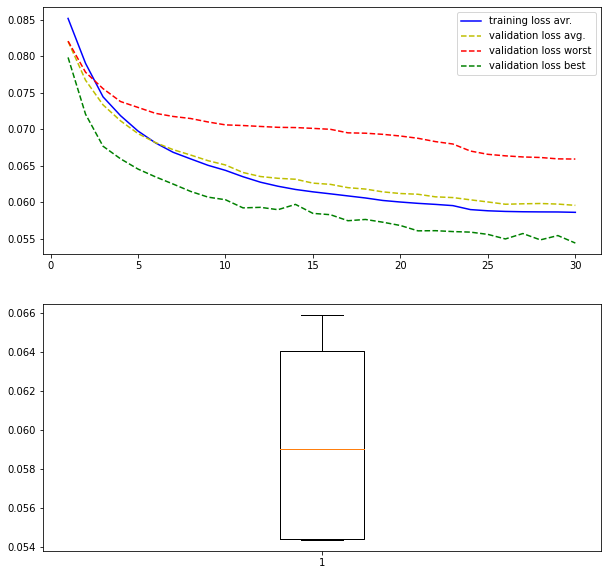

In [14]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(5,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=30, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")